<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/diplomado/tomates_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificacion de tomate en 6 variedades

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extraccion de fotos en carpeta especificada


In [ ]:
!unzip /content/drive/MyDrive/base_datos_tomates.zip -d /content/drive/MyDrive/TAREA_TOMATE

Archive:  /content/drive/MyDrive/base_datos_tomates.zip
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (14).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (22).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (13).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (61).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (23).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (54).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (52).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (43).jpg  
  inflating: /content/drive/MyDrive/TAREA_TOMATE/Base_Da

### Obtencion de direcciones

In [ ]:
import os

BASE_DIR = '/content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates'

TRAIN_DIR = os.path.join(BASE_DIR, 'Train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'Validation')
TEST_DIR = os.path.join(BASE_DIR, 'Test')

# Categorias de imagenes de entrenamiento
TRAIN_VERDE_DIR = os.path.join(TRAIN_DIR, '1_Verde')
TRAIN_QUEBRADO_DIR = os.path.join(TRAIN_DIR, '2_Quebrado')
TRAIN_RAYADO_DIR = os.path.join(TRAIN_DIR, '3_Rayado')
TRAIN_NARANJA_DIR = os.path.join(TRAIN_DIR, '4_Naranja')
TRAIN_ROJONARANJA_DIR = os.path.join(TRAIN_DIR, '5_RojoNaranja')
TRAIN_ROJO_DIR = os.path.join(TRAIN_DIR, '6_Rojo')

# Direcciones de validacion
VALIDATION_VERDE_DIR = os.path.join(VALIDATION_DIR, '1_Verde')
VALIDATION_QUEBRADO_DIR = os.path.join(VALIDATION_DIR, '2_Quebrado')
VALIDATION_RAYADO_DIR = os.path.join(VALIDATION_DIR, '3_Rayado')
VALIDATION_NARANJA_DIR = os.path.join(VALIDATION_DIR, '4_Naranja')
VALIDATION_ROJONARANJA_DIR = os.path.join(VALIDATION_DIR, '5_RojoNaranja')
VALIDATION_ROJO_DIR = os.path.join(VALIDATION_DIR, '6_Rojo')

# Direcciones de test
TEST_VERDE_DIR = os.path.join(TEST_DIR, '1_Verde')
TEST_QUEBRADO_DIR = os.path.join(TEST_DIR, '2_Quebrado')
TEST_RAYADO_DIR = os.path.join(TEST_DIR, '3_Rayado')
TEST_NARANJA_DIR = os.path.join(TEST_DIR, '4_Naranja')
TEST_ROJONARANJA_DIR = os.path.join(TEST_DIR, '5_RojoNaranja')
TEST_ROJO_DIR = os.path.join(TEST_DIR, '6_Rojo')


In [ ]:
print('total imagenes entrenamiento tomate verde :', len(os.listdir(TRAIN_VERDE_DIR)))
print('total imagenes VALIDACION tomate VERDE :', len(os.listdir(VALIDATION_VERDE_DIR)))
print('total imagenes TEST tomate VERDE :', len(os.listdir(TEST_VERDE_DIR)))


total imagenes entrenamiento tomate verde : 550
total imagenes VALIDACION tomate VERDE : 50
total imagenes TEST tomate VERDE : 100


### Data y modelos

#### ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5]
    )

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 90
target_size = (256, 256)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3300 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


#### Modelo 1: Sencillo

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 64)      9472      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 125, 125, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 119, 119, 32)      100384    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 111392)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
26/26 [==============================] - 651s 25s/step - loss: 0.5311 - accuracy: 0.2758 - val_loss: 0.3536 - val_accuracy: 0.4630
Epoch 2/10
26/26 [==============================] - 24s 916ms/step - loss: 0.2506 - accuracy: 0.6468 - val_loss: 0.2144 - val_accuracy: 0.7444
Epoch 3/10
26/26 [==============================] - 24s 910ms/step - loss: 0.1470 - accuracy: 0.8264 - val_loss: 0.1563 - val_accuracy: 0.7815
Epoch 4/10
26/26 [==============================] - 24s 912ms/step - loss: 0.0779 - accuracy: 0.9273 - val_loss: 0.1187 - val_accuracy: 0.8815
Epoch 5/10
26/26 [==============================] - 23s 887ms/step - loss: 0.0437 - accuracy: 0.9675 - val_loss: 0.0937 - val_accuracy: 0.9130
Epoch 6/10
26/26 [==============================] - 22s 870ms/step - loss: 0.0250 - accuracy: 0.9814 - val_loss: 0.0975 - val_accuracy: 0.9000
Epoch 7/10
26/26 [==============================] - 23s 884ms/step - loss: 0.0288 - accuracy: 0.9775 - val_loss: 0.1543 - val_accuracy: 0.9056


#### Modelo 2: VGG19

In [ ]:
nom_model = 'model21_VGG19'

In [ ]:
from tensorflow.keras.applications import VGG19

pre_trained_model = VGG19(input_shape = (256,256,3),
                          include_top = False,
                          weights = 'imagenet',
                          )

pre_trained_model.trainable = True

layers_to_train = ['block5_conv4']

for layer in pre_trained_model.layers:

  if layer.name in layers_to_train:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from tensorflow.keras import Model, layers, Sequential, regularizers

model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),

    # Capa densa con Batch Normalization
    layers.Dense(4096, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    # Capa densa con Batch Normalization
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa densa con Batch Normalization
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa densa con Batch Normalization
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa de salida
    layers.Dense(6, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4096)              2101248   
                                                                 
 batch_normalization (Batch  (None, 4096)              16384     
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate= 0.001),
                loss='categorical_crossentropy',
                metrics = ['acc'])
steps_per_epoch = train_generator.n //batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)
print(validation_steps)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = 'pesos_checkpoint.hdf5', save_best_only=True, verbose = 1)
early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2,
    callbacks = [checkpoint, early_stop]
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 19.61552, saving model to pesos_checkpoint.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 - 1938s - loss: 21.9912 - acc: 0.4410 - val_loss: 19.6155 - val_acc: 0.1660 - 1938s/epoch - 108s/step
Epoch 2/100

Epoch 2: val_loss improved from 19.61552 to 14.41182, saving model to pesos_checkpoint.hdf5
18/18 - 60s - loss: 16.1593 - acc: 0.6294 - val_loss: 14.4118 - val_acc: 0.3145 - 60s/epoch - 3s/step
Epoch 3/100

Epoch 3: val_loss improved from 14.41182 to 10.70211, saving model to pesos_checkpoint.hdf5
18/18 - 60s - loss: 11.5628 - acc: 0.7623 - val_loss: 10.7021 - val_acc: 0.2910 - 60s/epoch - 3s/step
Epoch 4/100

Epoch 4: val_loss improved from 10.70211 to 7.93886, saving model to pesos_checkpoint.hdf5
18/18 - 60s - loss: 8.2173 - acc: 0.8041 - val_loss: 7.9389 - val_acc: 0.2461 - 60s/epoch - 3s/step
Epoch 5/100

Epoch 5: val_loss improved from 7.93886 to 6.19284, saving model to pesos_checkpoint.hdf5
18/18 - 60s - loss: 5.8638 - acc: 0.8213 - val_loss: 6.1928 - val_acc: 0.2656 - 60s/epoch - 3s/step
Epoch 6/100

Epoch 6: val_loss improved from 6.19284 to 5.19450, saving

FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'content/drive/MyDrive/models/model21_VGG19/pesos_modelo.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [ ]:
model.save_weights('pesos_modelo.h5')

#### Modelo 3: EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from

pre_trained_model = EfficientNetB0(input_shape = (256,256,3),
                          include_top = False,
                          weights = 'imagenet')

pre_trained_model.trainable = True


for layer in pre_trained_model.layers[-15:]:
  layer.trainable = True

pre_trained_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 256, 256, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 256, 256, 3)          0         ['normalization_2

In [ ]:


model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),
    # Primera capa densa con Batch Normalization
    layers.Dense(4096, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    # Segunda capa densa con Batch Normalization
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    # Tercera capa densa con Batch Normalization
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    # Capa de salida
    layers.Dense(6, activation='softmax')
])

model.summary()


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate= 0.001),
                loss='categorical_crossentropy',
                metrics = ['acc'])
steps_per_epoch = train_generator.n //batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)
print(validation_steps)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = f'/drive/MyDrive/models/{nom_model}/mejores_pesos_modelo.hdf5', save_best_only=True, verbose = 1)
early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 200,
    validation_steps = validation_steps,
    verbose = 2,
    callbacks = [checkpoint, early_stop]
)

model.save_weights(f'/drive/MyDrive/models/{nom_model}/pesos_modelo.hdf5')

Epoch 1/200

Epoch 1: val_loss improved from inf to 11.46214, saving model to /drive/MyDrive/models/model3_efficient/mejores_pesos_modelo.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 - 685s - loss: 19.6922 - acc: 0.6331 - val_loss: 11.4621 - val_acc: 0.1632 - 685s/epoch - 19s/step
Epoch 2/200

Epoch 2: val_loss improved from 11.46214 to 4.54939, saving model to /drive/MyDrive/models/model3_efficient/mejores_pesos_modelo.hdf5
37/37 - 84s - loss: 4.9835 - acc: 0.8998 - val_loss: 4.5494 - val_acc: 0.1719 - 84s/epoch - 2s/step
Epoch 3/200

Epoch 3: val_loss improved from 4.54939 to 3.07805, saving model to /drive/MyDrive/models/model3_efficient/mejores_pesos_modelo.hdf5
37/37 - 84s - loss: 2.0439 - acc: 0.8917 - val_loss: 3.0781 - val_acc: 0.1667 - 84s/epoch - 2s/step
Epoch 4/200

Epoch 4: val_loss did not improve from 3.07805
37/37 - 78s - loss: 1.1166 - acc: 0.9572 - val_loss: 3.8422 - val_acc: 0.1701 - 78s/epoch - 2s/step
Epoch 5/200

Epoch 5: val_loss improved from 3.07805 to 2.80136, saving model to /drive/MyDrive/models/model3_efficient/mejores_pesos_modelo.hdf5
37/37 - 78s - loss: 0.7095 - acc: 0.9645 - val_loss: 2.8014 - val_acc: 0.1649 - 78s/epoch - 2s/s

KeyboardInterrupt: 

#### Modelo 4: Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Función para un bloque ResNet básico
def resnet_block(input_tensor, filters, kernel_size=3, stride=1, conv_shortcut=True):
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    if conv_shortcut:
        shortcut = Conv2D(filters, kernel_size, padding='same', strides=stride)(input_tensor)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Definir la entrada
input_image = Input(shape=(256, 256, 3))

# Primera capa convolucional
x = Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(input_image)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)

# Bloque ResNet
x = resnet_block(x, 64)
x = Dropout(0.4)(x)

# Segunda capa convolucional
x = Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)

# Otro bloque ResNet
x = resnet_block(x, 128)
x = Dropout(0.4)(x)

# Capas completamente conectadas
x = Flatten()(x)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Capa de salida
output = Dense(6, activation='softmax')(x)  # Ajustar el número de clases según tu caso

# Definir el modelo
model = Model(inputs=input_image, outputs=output)

# Compilar el modelo
model.compile(optimizer= Adam(learning_rate= 3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la arquitectura del modelo
model.summary()

# Aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 512
dimensions = (256, 256)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = dimensions,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=dimensions,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=dimensions,
    batch_size=batch_size,
    class_mode='categorical'
)

steps_per_epoch = train_generator.n //batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)
print(validation_steps)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 32)         0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.callbacks import Callback
import pandas as pd

class BackupAndSave(Callback):
    def __init__(self, save_path, save_interval=10):
        super(BackupAndSave, self).__init__()
        self.save_path = save_path
        self.save_interval = save_interval

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.save_interval == 0:
            # Guardar el modelo
            model_save_path = os.path.join(self.save_path, f'model_epoch_{epoch}.h5')
            self.model.save(model_save_path)
            # Guardar el historial
            history_df = pd.DataFrame(self.model.history.history)
            history_save_path = os.path.join(self.save_path, f'history_epoch_{epoch}.csv')
            history_df.to_csv(history_save_path, index=False)
            print(f'Backup saved for epoch {epoch}')

# Callback de Backup
backup_callback = BackupAndSave(save_path='content/drive/MyDrive/models/model41_resnet', save_interval=10)


## Checkpoint and early stop
checkpoint_path = '/content/drive/MyDrive/models/model41_resnet/mejores_pesos_modelo.hdf5'

checkpoint = ModelCheckpoint(filepath = checkpoint_path, save_best_only=True, verbose = 1)
# early_stop = EarlyStopping(monitor='val_loss', patience = 15, restore_best_weights=True, mode='min')

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 150,
    validation_steps = validation_steps,
    verbose = 2,
    callbacks = [checkpoint, backup_callback]
)


Epoch 1/150

Epoch 1: val_loss improved from inf to 11.71218, saving model to /content/drive/MyDrive/models/model41_resnet/mejores_pesos_modelo.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Backup saved for epoch 0
4/4 - 238s - loss: 10.5420 - accuracy: 0.5731 - val_loss: 11.7122 - val_accuracy: 0.1797 - 238s/epoch - 59s/step
Epoch 2/150

Epoch 2: val_loss did not improve from 11.71218
4/4 - 224s - loss: 10.7213 - accuracy: 0.6631 - val_loss: 12.3190 - val_accuracy: 0.1680 - 224s/epoch - 56s/step
Epoch 3/150

Epoch 3: val_loss did not improve from 11.71218
4/4 - 211s - loss: 10.8167 - accuracy: 0.7569 - val_loss: 12.7427 - val_accuracy: 0.1582 - 211s/epoch - 53s/step
Epoch 4/150

Epoch 4: val_loss did not improve from 11.71218
4/4 - 230s - loss: 10.8043 - accuracy: 0.8120 - val_loss: 13.0519 - val_accuracy: 0.1680 - 230s/epoch - 57s/step
Epoch 5/150

Epoch 5: val_loss did not improve from 11.71218
4/4 - 213s - loss: 10.6761 - accuracy: 0.8538 - val_loss: 13.2118 - val_accuracy: 0.1641 - 213s/epoch - 53s/step
Epoch 6/150

Epoch 6: val_loss did not improve from 11.71218
4/4 - 210s - loss: 10.4501 - accuracy: 0.8845 - val_loss: 13.1001 - val_accuracy: 0.1816 - 210s/epoch - 5

KeyboardInterrupt: 

In [ ]:
# Ejecuta esto en una celda de tu notebook de Colab
import time
import requests

# URL para mantener la sesión activa
url = 'https://notebooks.googleapis.com/v1/projects/sessions/<session-id>:execute'

def keep_colab_alive():
    while True:
        requests.post(url)
        time.sleep(60)

# Llamar a la función en segundo plano
import threading
threading.Thread(target=keep_colab_alive, daemon=True).start()


In [ ]:
model.save(f'/content/drive/MyDrive/models/model41_resnet/modelo.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Modelo 5: Branched


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir la entrada
input_image = Input(shape=(227, 227, 3))

# Primera capa convolucional
x = Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(input_image)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)

# Bloque ResNet
x = resnet_block(x, 64)
x = Dropout(0.4)(x)

# Segunda capa convolucional
x = Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(x)



#### Modelo 6: AlexNet

In [ ]:
def create_alexnet_model(input_shape=(150, 150, 3)):
    input_layer = Input(shape=input_shape)

    x = Conv2D(96, (11, 11), strides=(4, 4), padding='valid')(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (5, 5), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(384, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(384, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Flatten()(x)

    x = Dense(4096, activation='relu')(x)

    x = Dense(4096, activation='relu')(x)

    output_layer = Dense(6, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model


ImportError: cannot import name 'AlexNet' from 'tensorflow.keras.applications' (/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/applications/__init__.py)

#### Modelo 2.1: VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import Model, layers, Sequential, regularizers


### Pre-model
pre_trained_model = VGG19(input_shape = (150,150,3),
                          include_top = False,
                          weights = 'imagenet',
                          )

pre_trained_model.trainable = True

layers_to_train = ['block5_conv4']

for layer in pre_trained_model.layers:

  if layer.name in layers_to_train:
    layer.trainable = True
  else:
    layer.trainable = False



In [ ]:
### Model

model = Sequential([
    pre_trained_model,
    layers.Flatten(),

    # Capa densa con Batch Normalization
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    # Capa densa con Batch Normalization
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa densa con Batch Normalization
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa de salida
    layers.Dense(6, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
                loss='categorical_crossentropy',
                metrics = ['acc'])
steps_per_epoch = train_generator.n //batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)
print(validation_steps)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = 'pesos_checkpoint.hdf5', save_best_only=True, verbose = 1)
early_stop = EarlyStopping(monitor='val_loss', patience = 8, restore_best_weights=True, mode='min')

26
6


In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 15.86233, saving model to pesos_checkpoint.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 - 365s - loss: 16.1948 - acc: 0.2567 - val_loss: 15.8623 - val_acc: 0.2556 - 365s/epoch - 14s/step
Epoch 2/100

Epoch 2: val_loss improved from 15.86233 to 13.57190, saving model to pesos_checkpoint.hdf5
26/26 - 42s - loss: 14.4483 - acc: 0.4225 - val_loss: 13.5719 - val_acc: 0.4333 - 42s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_loss improved from 13.57190 to 12.26418, saving model to pesos_checkpoint.hdf5
26/26 - 40s - loss: 12.8262 - acc: 0.5775 - val_loss: 12.2642 - val_acc: 0.5685 - 40s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_loss improved from 12.26418 to 11.16696, saving model to pesos_checkpoint.hdf5
26/26 - 41s - loss: 11.4382 - acc: 0.6897 - val_loss: 11.1670 - val_acc: 0.5722 - 41s/epoch - 2s/step
Epoch 5/100

Epoch 5: val_loss improved from 11.16696 to 10.08099, saving model to pesos_checkpoint.hdf5
26/26 - 40s - loss: 10.2453 - acc: 0.7264 - val_loss: 10.0810 - val_acc: 0.7037 - 40s/epoch - 2s/step
Epoch 6/100

Epoch 6: val_loss improved from 10.08099 to 9.18432, s

In [ ]:
model2 = Sequential([
    pre_trained_model,
    layers.Flatten(),

    # Capa 1
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    # Capa 2
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa 3
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    # Capa de salida
    layers.Dense(6, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1

In [ ]:
model.load_weights('pesos_checkpoint.hdf5')

#### Sandbox

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model, layers, Sequential, regularizers


### Pre-model
pre_trained_model = VGG16(input_shape = (256,256,3),
                          include_top = False,
                          weights = 'imagenet',
                          )

pre_trained_model.trainable = True

layers_to_train = ['block5_conv4']

for layer in pre_trained_model.layers:

  if layer.name in layers_to_train:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model = Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              134221824 
                                                                 
 dense_4 (Dense)             (None, 512)               2097664   
                                                                 
 dense_5 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 151037254 (576.16 MB)
Trainable params: 136322566 (520.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate= 1e-4),
                loss='categorical_crossentropy',
                metrics = ['acc'])
steps_per_epoch = train_generator.n //batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)
print(validation_steps)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = 'pesos_checkpoint.hdf5', save_best_only=True, verbose = 1)
early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')

36
3


In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.45271, saving model to pesos_checkpoint.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 - 713s - loss: 2.4283 - acc: 0.2570 - val_loss: 1.4527 - val_acc: 0.3778 - 713s/epoch - 20s/step
Epoch 2/100

Epoch 2: val_loss improved from 1.45271 to 1.34670, saving model to pesos_checkpoint.hdf5
36/36 - 102s - loss: 1.5287 - acc: 0.3629 - val_loss: 1.3467 - val_acc: 0.4444 - 102s/epoch - 3s/step
Epoch 3/100

Epoch 3: val_loss improved from 1.34670 to 1.22185, saving model to pesos_checkpoint.hdf5
36/36 - 94s - loss: 1.3983 - acc: 0.4277 - val_loss: 1.2218 - val_acc: 0.5000 - 94s/epoch - 3s/step
Epoch 4/100

Epoch 4: val_loss did not improve from 1.22185
36/36 - 91s - loss: 1.2501 - acc: 0.4738 - val_loss: 1.2274 - val_acc: 0.4963 - 91s/epoch - 3s/step
Epoch 5/100

Epoch 5: val_loss improved from 1.22185 to 1.20275, saving model to pesos_checkpoint.hdf5
36/36 - 95s - loss: 1.2046 - acc: 0.5112 - val_loss: 1.2027 - val_acc: 0.5222 - 95s/epoch - 3s/step
Epoch 6/100

Epoch 6: val_loss improved from 1.20275 to 1.01199, saving model to pesos_checkpoint.hdf5
36/36 - 94s - loss: 1.0

In [ ]:
model.load_weights('pesos_checkpoint.hdf5')

In [ ]:
model.save('/content/drive/MyDrive/models/last_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights('/content/drive/MyDrive/models/last_model_weights.h5')

In [ ]:
import pandas as pd

hist_df = pd.DataFrame(history.history)

hist_df.to_csv(f'/content/drive/MyDrive/models/last_history.csv')

In [ ]:
import time
from google.colab import files
import os

# Verificar si el archivo existe en la ruta especificada
file_path = '/content/pesos_checkpoint.hdf5'
if os.path.exists(file_path):
    print("El archivo existe. Esperando 60 segundos antes de descargar.")

    # Esperar 60 segundos
    # time.sleep(60)

    # Descargar el archivo pesos_checkpoint.hdf5
    # files.download(file_path)

    # Desconectar y borrar el tiempo de ejecución
    from google.colab import runtime
    runtime.unassign()
else:
    print("El archivo no se encontró en la ruta especificada.")


El archivo existe. Esperando 60 segundos antes de descargar.


## Testing

In [ ]:
nom_model = 'Prueba original'

In [ ]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


# os.makedirs(f"drive/MyDrive/models/{nom_model}", exist_ok=True)

In [ ]:
# Funcion que permite graficar las matrices de confusion
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

In [ ]:
nom_model = 'model41_resnet'

In [ ]:
model.save_weights(f'/content/drive/MyDrive/models/{nom_model}/pesos_modelo2.hdf5')

In [ ]:
test_lost, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

7/7 [==============================] - 182s 30s/step - loss: 0.7617 - acc: 0.6917
Test accuracy: 0.6916666626930237


#### History visualization

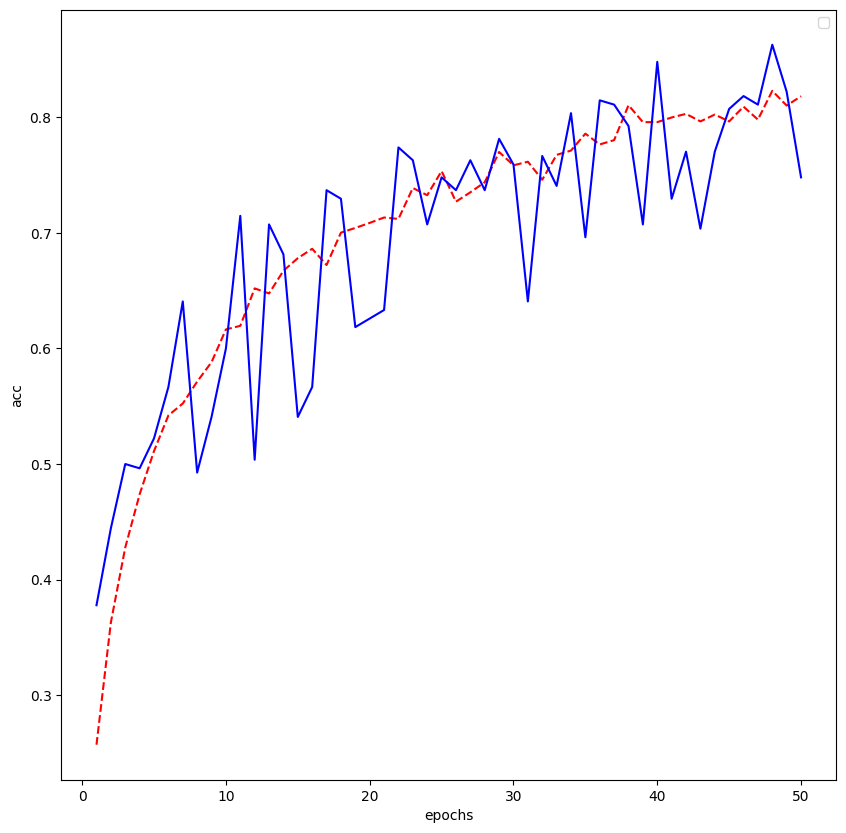

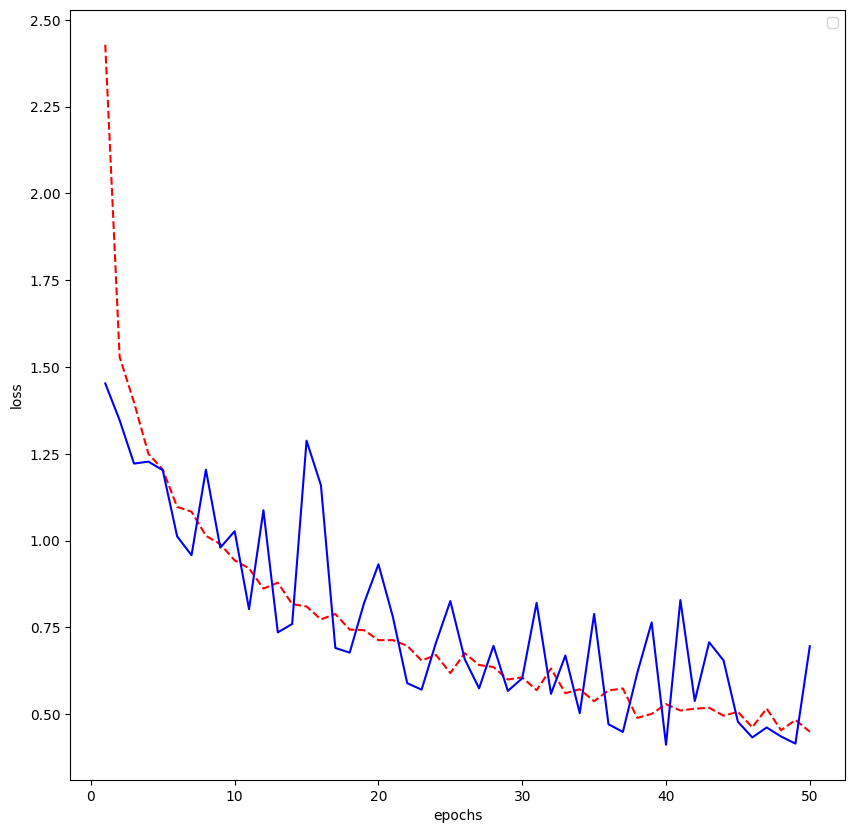

In [ ]:
import matplotlib.pyplot as plt
## Accuracy visualization

acc = history.history['acc']
val_acc = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     acc, 'r--', label=''  )
ax.plot  ( epochs, val_acc,  'b', label='')
ax.set_title ("")
ax.set_ylabel('acc')
ax.set_xlabel('epochs')
ax.legend()
f.savefig(f'/content/drive/MyDrive/models/Training and Validation Accuracy.png')
#f.savefig(f"Training and Validation Accuracy {nom_model}.eps")

## Loss visualization

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     loss, 'r--', label=''  )
ax.plot  ( epochs, val_loss ,  'b', label='' )
ax.set_title ("")
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.legend()
f.savefig(f"drive/MyDrive/models/Training and Validation Loss.png")


In [ ]:
prediccions = model.predict(test_generator)

7/7 [==============================] - 54s 2s/step


#### Predictions

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/models/Prueba original/Prueba original_matrix_confusion.png'

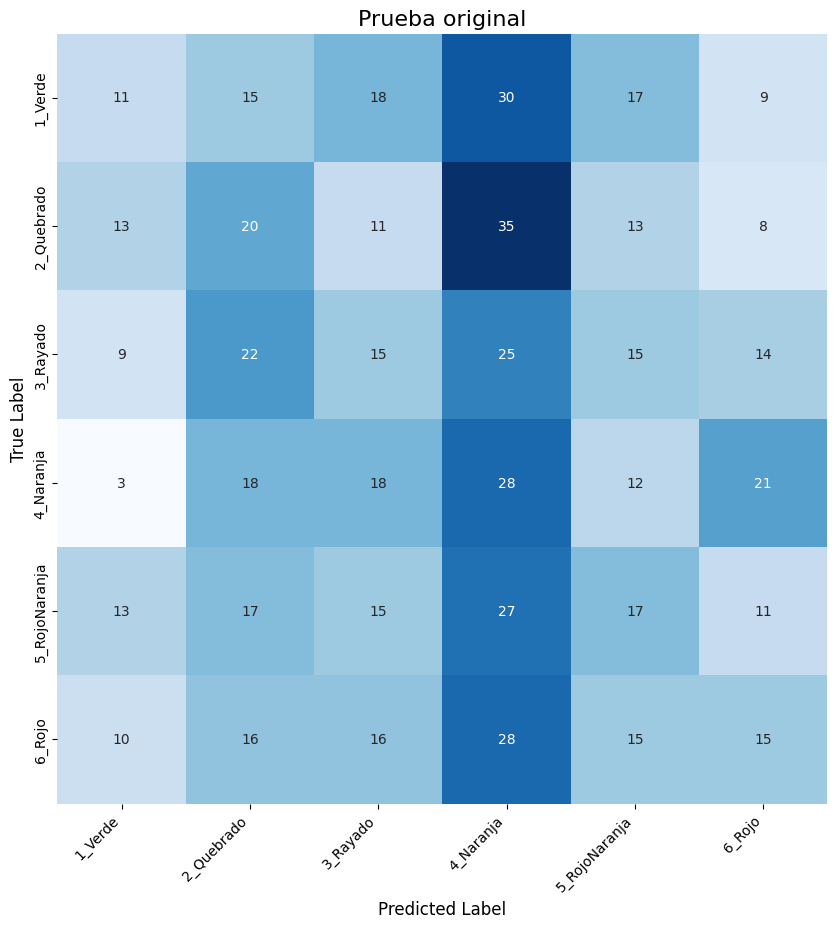

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_heatmap(test_generator.classes, np.argmax(prediccions,axis=1), test_generator.class_indices.keys() , ax, title=f"{nom_model}")
# fig.savefig(f"drive/MyDrive/models/{nom_model}/{nom_model}_matrix_confusion.png")

In [ ]:
print(classification_report(test_generator.classes, np.argmax(prediccions,axis=1), target_names=test_generator.class_indices ))

               precision    recall  f1-score   support

      1_Verde       0.19      0.11      0.14       100
   2_Quebrado       0.19      0.20      0.19       100
     3_Rayado       0.16      0.15      0.16       100
    4_Naranja       0.16      0.28      0.21       100
5_RojoNaranja       0.19      0.17      0.18       100
       6_Rojo       0.19      0.15      0.17       100

     accuracy                           0.18       600
    macro avg       0.18      0.18      0.17       600
 weighted avg       0.18      0.18      0.17       600



In [ ]:
hist_df = pd.DataFrame(history.history)

hist_df.to_csv(f'drive/MyDrive/models/{nom_model}/history.csv')

In [ ]:
model.save(f'drive/MyDrive/models/{nom_model}/model_complete.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prueba de prediccion

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


def load_and_process_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


In [ ]:
img_path = '/content/drive/MyDrive/ext_test.jpg'
img_array = load_and_process_image(img_path)

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ext_test.jpg'

In [ ]:
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())

print("Color:", class_labels[predicted_class])

1/1 [==============================] - 0s 314ms/step
Color: 3_Rayado


# Prueba aleatoria

In [ ]:
import os

path = '/content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Test'

clases = os.listdir(path)

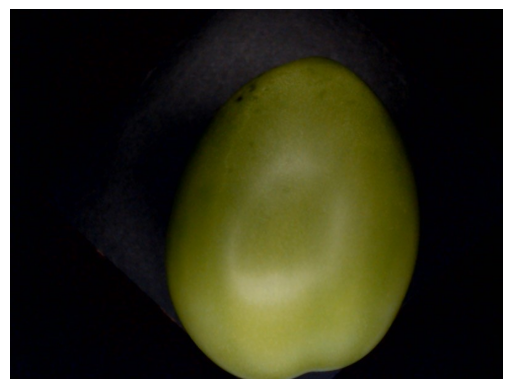

1/1 [==============================] - 0s 41ms/step
Real: 1_Verde
Predicted: 2_Quebrado


In [ ]:
# Seleccion de foto aleatoria
### Clase aleatoria
clase = np.random.choice(clases)
path_clase = os.path.join(path, clase)

### Foto aleatoria
fotos = os.listdir(path_clase)
img_path = os.path.join(path_clase, np.random.choice(fotos))
img_path

# Procesado
img_array = load_and_process_image(img_path)

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()

# Prediccion de clase
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())

print("Real:", clase)
print("Predicted:", class_labels[predicted_class])

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/models/vgg19_mod/modelo_funcional.h5')

# Moviendo datos

In [ ]:
import os
import shutil
from random import sample


In [ ]:
base_dir = "/content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates"
train_dir = os.path.join(base_dir, "Train")
validation_dir = os.path.join(base_dir, "Validation")
test_dir = os.path.join(base_dir, "Test")


In [ ]:
def move_images(src_dir, dest_dir, class_name, num_images, prefix="add_"):
    src_path = os.path.join(src_dir, class_name)
    dest_path = os.path.join(dest_dir, class_name)
    os.makedirs(dest_path, exist_ok=True)

    # Listar todas las imágenes en el directorio de origen
    images = os.listdir(src_path)
    images_to_move = sample(images, num_images)

    for img in images_to_move:
        src_img_path = os.path.join(src_path, img)
        new_img_name = prefix + img
        dest_img_path = os.path.join(dest_path, new_img_name)
        shutil.move(src_img_path, dest_img_path)



In [ ]:
for class_name in os.listdir(validation_dir):
    move_images(validation_dir, train_dir, class_name, 50, prefix='add_val_')

In [ ]:
for class_name in os.listdir(test_dir):
    move_images(test_dir, train_dir, class_name, 100, prefix='add_test_')


In [ ]:
train_dir

'/content/drive/MyDrive/TAREA_TOMATE/Base_Datos_Tomates/Train'